In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./Datasets/data 3.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X = data.drop("target", axis=1)
y = data["target"]

In [8]:
def PCA(X, number_components):
    
    x_meaned = X - np.mean(X, axis=0)
    cov_mat = np.cov(x_meaned, rowvar = False)
    
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigen_values = eigen_values[sorted_index]
    sorted_eigen_vectors = eigen_vectors[:,sorted_index]
    
    eigen_vectors_subset = sorted_eigen_vectors[:,0:number_components]
    
    return np.dot(eigen_vectors_subset.transpose(),x_meaned.transpose()).transpose()

In [9]:
mat_reduced = PCA(X, 2)

In [10]:
mat_reduced

array([[ 1.22673448e+01,  2.87383781e+00],
       [-2.69013712e+00, -3.98713736e+01],
       [ 4.29502141e+01, -2.36368199e+01],
       [ 1.09447564e+01, -2.84380358e+01],
       [-1.06979053e+02, -1.58744678e+01],
       [ 5.36472038e+01,  4.00392377e+00],
       [-4.80821551e+01, -3.03896086e+00],
       [-1.55660590e+01, -2.62745637e+01],
       [ 4.54388962e+01, -7.42977739e+00],
       [ 7.73163161e+01, -1.99100759e+01],
       [ 6.94323738e+00, -9.17536374e+00],
       [-2.84259379e+01,  8.47126467e+00],
       [-1.92477377e+01, -2.24212575e+01],
       [ 3.58055558e+01,  5.70343964e+00],
       [-3.75886896e+01, -1.02579437e+01],
       [ 2.79998518e+01, -9.64570379e+00],
       [-9.29750393e+01, -2.42584272e+01],
       [ 1.86307973e+01,  3.92597411e+01],
       [-1.00245407e+00, -2.10404091e+01],
       [ 6.28419048e+00,  2.34469473e+00],
       [ 1.19811457e+01, -9.66308502e+00],
       [ 1.39453649e+01, -3.05172542e+01],
       [ 2.05255102e+01, -2.87200024e+01],
       [ 2.

In [18]:
principal_df = pd.DataFrame(mat_reduced, columns=["PC1","PC2"])
principal_df = pd.concat([principal_df,pd.DataFrame(y)],axis=1)

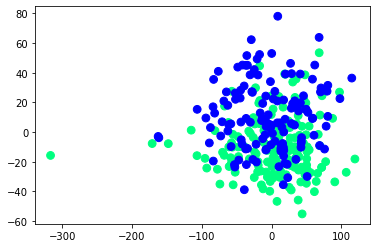

In [24]:
fig, ax = plt.subplots()

ax.scatter(data=principal_df, x="PC1", y="PC2", c="target", s=60, cmap="winter")